## Data Resources

Data is mined and collected from the Twitter developer API (using tweepy). Twitter API passes json format data, we fetched them for two groups of users, i) 23 famous bots ii)100 famous verified real accounts. We saved the fetched tweets from both group after cleaning as a dataframe format in a csv file. We currently have a bit over 12000 tweets and we plan to increase this database as the project moves forward. For each tweet, we have 28 variables that describe some feature of the tweet.

## EDA
Based on below preliminary EDA (at the end of this notebook) and histograms it seems that below feature can have predicting power. • Followers Count • Friends Count • Favorites Count • Retweet Count
As we continue to explore our data, this might change a bit as we learn which variables might have predictive power.
<hr style='height:2px'>

In [1]:
import tweepy # twitter's Python API
import pandas as pd
import json
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import numpy as np

In [1]:
# Key for API authentications
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''


In [ ]:
def get_api(screen_name,count):
    '''
        Downloaing all of the tweets from a screen_names
    '''
    # defining twitter developer access
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
 
    tweets = []

    latest_tweets = api.user_timeline(screen_name = screen_name, count = count)
    tweets.extend(latest_tweets)
    return tweets

In [219]:
def get_api_2(screen_name,count):
    '''
        Downloaing all of the tweets from a wellknown bots
        for last 7 days
    '''
    # defining twitter developer access
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
     
    tweets = []
    try:
        latest_tweets = api.user_timeline(screen_name = screen_name, count = count)
        tweets.extend(latest_tweets)
    except tweepy.TweepError:
        print('Error occured with users: {:s}, ignoring...'.format(screen_name))    
    
    return tweets

In [348]:
def store_tweets(tweets,file_name='data/tweets.json'):
    
    features = ['created_at', 'id', 'text',  'source','in_reply_to_status_id',  'geo', 
             'retweet_count', 'favorite_count', 'favorited', 'lang']
    sub_tags = ['entities', 'user', 'place']
    
    entities_tag = ['hashtags', 'urls']
    
    user_tag = ['id', 'name', 'screen_name', 'location', 'url','protected', 'followers_count', 'friends_count',
                'created_at', 'geo_enabled', 'verified', 'lang']
    
    place_tag = ['id', 'place_type', 'name', 'country_code']

    
    # a list of all formatted tweets
    tweet_list=[]

    for tweet in tweets:
 
        # a dict to contain information about single tweet
        tweet_information=dict()
        
        for feat in features:
            if (feat == 'created_at'):
                tweet_information['created_at']=tweet.created_at.strftime("%Y-%m-%d %H:%M:%S")
            else:
                tweet_information[feat]=tweet._json[feat]
        for s_tag in sub_tags:
            if (s_tag == 'entities'):
                for s_t in entities_tag:
                    if (s_t=='hashtags'):
                        tweet_information[s_t]=tweet._json['entities'][s_t]
#                         if (tweet._json['entities'][s_t]!= None):
#                             tweet_information[s_t]=tweet._json['entities'][s_t][0]['text']
#                         else:
#                             tweet_information[s_t]= np.nan
                        
                    else:
                        tweet_information[s_t]=tweet._json['entities'][s_t]
              
            elif (s_tag == 'user'):
                for s_t in user_tag:
                    tweet_information[s_t]=tweet._json['user'][s_t]
            
            elif (s_tag == 'place'):
                for s_t in place_tag:
                    if (tweet._json['place']!= None):
                        tweet_information[s_t]=tweet._json['place'][s_t] 
                    else:
                        tweet_information[s_t]= np.nan
    

        # add this tweet to the tweet_list
        tweet_list.append(tweet_information)
    #Save dictionary into json file
    with open(file_name,"w") as fd:
        json.dump( tweet_list, fd)

    # close the file_des
    fd.close()
    return tweet_list

In [381]:
def fetch_tweets(screen_names, count):
    alltweets=[]
    # get all tweets for each screen name
    for  screen_name in screen_names:
        alltweets.extend(get_api_2(screen_name,count=count))

    return alltweets


In [382]:
count = 100
screen_names = ['@_grammar_','@attention_cnn','@NYT4thDownBot','@oliviataters','@DearAssistant','@a_quilt_bot',
                '@reverseocr', '@accidental575','@JustToSayBot','@FavThingsBot','@portmanteau_bot','@BloombrgNewsish',
                '@AwlTags',
                '@TinyCareBot','@simpscreens','@censusAmericans',' @everycolorbot','@pentametron','@AutoCharts',
                '@big_ben_clock', ' @everycolorbot','@RealHumanPraise','@wayback_exe'
               ] #,,'@pixelsorter'

tweets = fetch_tweets(screen_names,count)

In [383]:
# Saving to json file
tweet_list = store_tweets(tweets,file_name='data/tweets.json')


In [384]:
#reading json files including tweets dictionaries
with open('data/tweets.json', "r") as fd:
    tweets1 = json.load(fd)



In [385]:
len(tweets1)

2287

---

In [ ]:
df = pd.DataFrame(tweets1)
df.to_csv('data/bot.csv')

In [373]:
df.columns

Index(['country_code', 'created_at', 'favorite_count', 'favorited',
       'followers_count', 'friends_count', 'geo', 'geo_enabled', 'hashtags',
       'id', 'in_reply_to_status_id', 'lang', 'location', 'name', 'place_type',
       'protected', 'retweet_count', 'screen_name', 'source', 'text', 'url',
       'urls', 'verified'],
      dtype='object')

In [376]:
df.head()

,country_code,created_at,favorite_count,favorited,followers_count,friends_count,geo,geo_enabled,hashtags,id,...,name,place_type,protected,retweet_count,screen_name,source,text,url,urls,verified
0,AQ,Mon Jun 25 16:06:39 +0000 2012,2,False,45802,2,"{'type': 'Point', 'coordinates': [-89.09786011...",True,[],4d25f30d2fbf1463,...,Antarctica,country,False,0,_grammar_,"<a href=""https://twitter.com/Your_Grammar"" rel...","I declare this message by you, @sprintcare, un...",http://t.co/y2OxdNwM0Y,"[{'url': 'https://t.co/YN2ntm6tBp', 'expanded_...",False
1,None,Mon Jun 25 16:06:39 +0000 2012,0,False,45802,2,"{'type': 'Point', 'coordinates': [-57.40262096...",True,[],None,...,None,None,False,0,_grammar_,"<a href=""https://twitter.com/Your_Grammar"" rel...","It was possible for you, @BoxeoMundial, to hav...",http://t.co/y2OxdNwM0Y,[],False
2,None,Mon Jun 25 16:06:39 +0000 2012,4,False,45802,2,"{'type': 'Point', 'coordinates': [-59.7565709,...",True,[],None,...,None,None,False,0,_grammar_,"<a href=""https://twitter.com/Your_Grammar"" rel...",I insist that it would have been better if you...,http://t.co/y2OxdNwM0Y,"[{'url': 'https://t.co/I4TBAoxzw3', 'expanded_...",False
3,None,Mon Jun 25 16:06:39 +0000 2012,1,False,45802,2,"{'type': 'Point', 'coordinates': [57.07041009,...",True,[],None,...,None,None,False,0,_grammar_,"<a href=""https://twitter.com/Your_Grammar"" rel...",I discovered @Bmac0507 ought to type “Marvel [...,http://t.co/y2OxdNwM0Y,[],False
4,None,Mon Jun 25 16:06:39 +0000 2012,6,False,45802,2,"{'type': 'Point', 'coordinates': [27.58900536,...",True,[],None,...,None,None,False,0,_grammar_,"<a href=""https://twitter.com/Your_Grammar"" rel...","I consider this update by you, @EwanMacKenna, ...",http://t.co/y2OxdNwM0Y,"[{'url': 'https://t.co/bEN4JKvwsa', 'expanded_...",False


In [367]:
df.describe().columns

Index(['favorite_count', 'followers_count', 'friends_count',
       'in_reply_to_status_id', 'retweet_count'],
      dtype='object')

<hr style='height:2px'>

# EDA

Based on below preliminary EDA and histograms it seems that below feature can have predicting power.
• Followers Count
• Friends Count
• Favorites Count
• Retweet Count

As we continue to explore our data, this might change a bit as we learn which variables might have predictive power.



 Bot Generated Tweets


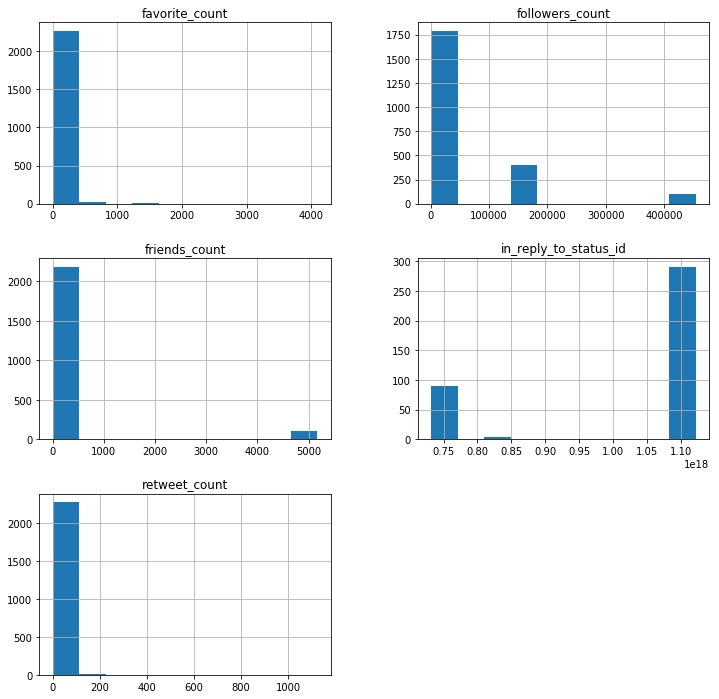

In [389]:
df1 = df[['favorite_count', 'followers_count', 'friends_count',
       'in_reply_to_status_id', 'retweet_count']]
df1.hist(figsize=(12,12));
print(' Bot Generated Tweets')



In [239]:
df_real = pd.read_csv('data/top_100.csv')
real_tweets = fetch_tweets(df_real.id,count=100)

Error occured with users: @ddlovato, ignoring...


In [240]:
tweet_list = store_tweets(real_tweets,file_name='data/real_tweets.json')

with open('data/real_tweets.json', "r") as fd:
    tweets_real = json.load(fd)
df_real = pd.DataFrame(tweets_real)

 Human Generated Tweets


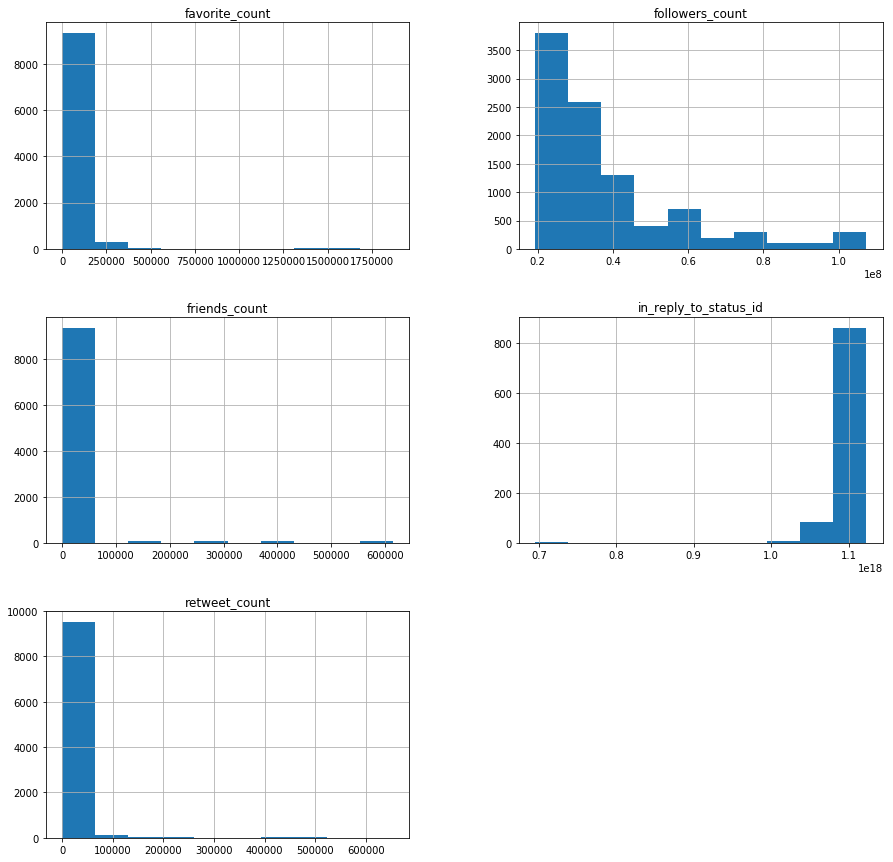

In [388]:
df2 = df_real[['favorite_count', 'followers_count', 'friends_count','in_reply_to_status_id', 'retweet_count']]
df2.hist(figsize=(15,15));

print(' Human Generated Tweets')


In [246]:
df1['type'] = 1 # it is bot
df2['type'] = 0 # it is real

/Users/yalda/anaconda3/envs/109b/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/yalda/anaconda3/envs/109b/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [250]:
df_appended = df1.append(df2)

In [380]:
# Total Number of Tweets
len(df_appended)

12072

In [312]:
df_appended.describe().columns

Index(['favorite_count', 'followers_count', 'friends_count',
       'in_reply_to_status_id', 'retweet_count', 'type'],
      dtype='object')

In [386]:
# df_appended.groupby('type').hist(alpha=0.4,figsize=(12,12));


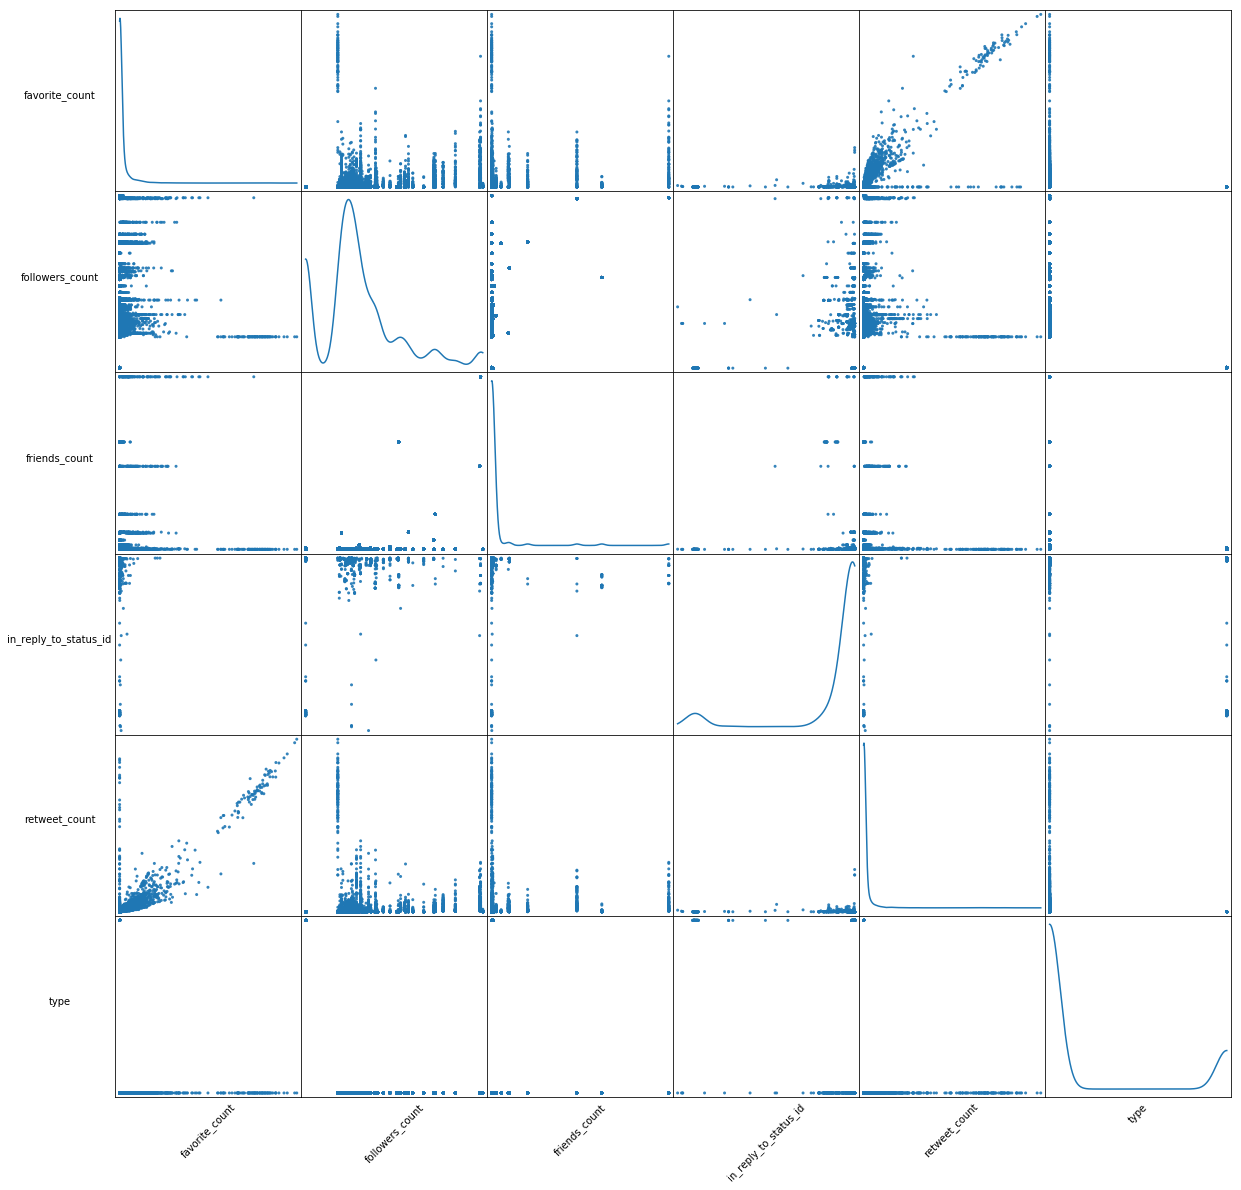

In [266]:
### this code goes after @1
from pandas.plotting import scatter_matrix
smplot = scatter_matrix(df_appended, alpha=0.9, figsize=(20, 20), diagonal='kde')

[s.xaxis.label.set_rotation(45) for s in smplot.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in smplot.reshape(-1)]
[s.get_yaxis().set_label_coords(-0.3,0.5) for s in smplot.reshape(-1)]

[s.set_xticks(()) for s in smplot.reshape(-1)]
[s.set_yticks(()) for s in smplot.reshape(-1)]

plt.savefig('scatter_matrix.png')
plt.show()